In [17]:
import sqlparse as sp
import numpy as np
import pandas as pd
import pylab as P
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

data = pd.read_csv ('exec_time.csv',sep = '@',names = ['query','exec_time'])
data1=data.copy()
data.exec_time = pd.to_numeric(data.exec_time,errors='coerce')
data.query=data['query'].apply(np.frompyfunc(lambda x : sp.parse(x),1,1))

In [19]:
data['stmttype'] = 0

In [21]:
for i in range (0,len(data)):
    data.loc[i,('stmttype')] = data.query[i].get_type()
    i = i + 1

In [23]:
data['numfields'] = 0

In [25]:
for i in range (0,len(data)):
    parsed_query = [t.to_unicode() for t in data.query[i].tokens if t.ttype is None]
    if (len(parsed_query) > 0):
         if (data.query[i].get_type() == 'SELECT'):
            data.loc[i,('numfields')] = len(parsed_query[0].split(','))
         if (data.query[i].get_type() == 'INSERT'):
            if (len(parsed_query[0].split('(')) > 1):
                data.loc[i,('numfields')] = len(parsed_query[0].split('(')[1].split(','))
            else:
                data.loc[i,('numfields')] = len(parsed_query[1].split(','))
         if (data.query[i].get_type() == 'UPDATE'):
            data.loc[i,('numfields')] = len(parsed_query[1].split(','))
         if (data.query[i].get_type() == 'DELETE'):
            data.loc[i,('numfields')] = 0
    i = i + 1

In [27]:
data['numtables'] = 0

In [29]:
for i in range (0,len(data)):
    if (len(parsed_query) > 1):
        if (data.query[i].get_type() == 'SELECT'):
            numtables = 0
            splitjoin = data.query[i].to_unicode().upper().split(' JOIN ')
            for setoftables in splitjoin:
                splitfrom = setoftables.split(' FROM ')
                numtables = numtables + len(splitfrom[len(splitfrom)-1].split(' WHERE ')[0].split(')')[0].split(','))
            data.loc[i,('numtables')] = numtables
        else:
            data.loc[i,('numtables')] = 1
    else:
        data.loc[i,('numtables')] = 1
    i = i + 1

In [31]:
data['querydepth'] = 0

In [32]:
for i in range (0,len(data)):
    if (len(parsed_query) > 1):
        data.loc[i,('querydepth')] = len(data.query[i].to_unicode().upper().split( ' FROM ')) - 1

In [33]:
data['logexectime'] = 0
for i in range (0,len(data)):
    if data.loc[i,('exec_time')] > 0:
        data.loc[i,('logexectime')] = m.log10(data.loc[i,('exec_time')])
data['lognumtables'] = 0
for i in range (0,len(data)):
    if data.loc[i,('numtables')] > 0:
        data.loc[i,('lognumtables')] = m.log10(data.loc[i,('numtables')])
data['lognumfields'] = 0
for i in range (0,len(data)):
    if data.loc[i,('numfields')] > 0:
        data.loc[i,('lognumfields')] = m.log10(data.loc[i,('numfields')])
data['logquerydepth'] = 0
for i in range (0,len(data)):
    if data.loc[i,('querydepth')] > 0:
        data.loc[i,('logquerydepth')] = m.log10(data.loc[i,('querydepth')])


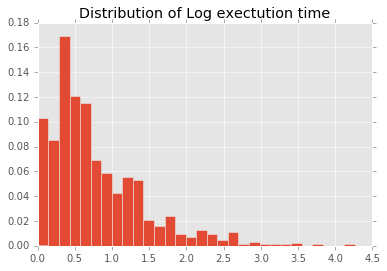

In [34]:
import matplotlib.pyplot as plt
let_data = data[data.logexectime >0].logexectime
lnf_data = data[data.logexectime > 0].lognumfields
lnt_data = data[data.logexectime > 0].lognumtables
lqd_data = data[data.logexectime > 0].logquerydepth
fig,axes = plt.subplots()
axes.hist(let_data,bins=30,weights=np.zeros_like(let_data) + 1. / let_data.size)
axes.set_title("Distribution of Log exectution time")


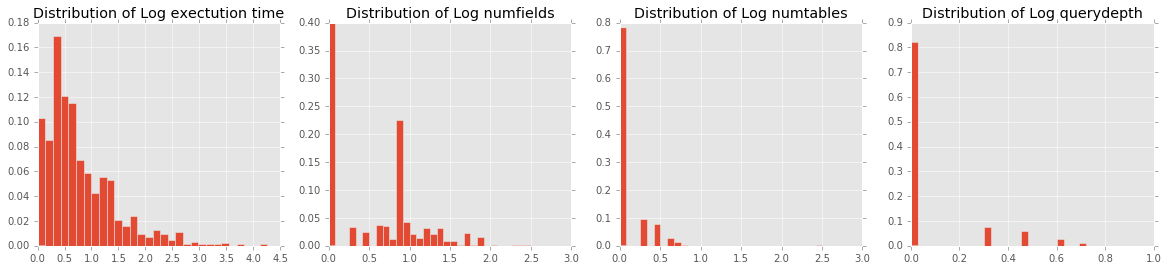

In [36]:
fig,axes = plt.subplots(1,4,figsize=(20,4))
axes[0].hist(let_data,bins=30,weights=np.zeros_like(let_data) + 1. / let_data.size)
axes[0].set_title("Distribution of Log exectution time")
axes[1].hist(lnf_data,bins=30,weights=np.zeros_like(lnf_data) + 1. / lnf_data.size)
axes[1].set_title("Distribution of Log numfields")
axes[2].hist(lnt_data,bins=30,weights=np.zeros_like(lnt_data) + 1. / lnt_data.size)
axes[2].set_title("Distribution of Log numtables")
axes[3].hist(lqd_data,bins=30,weights=np.zeros_like(lqd_data) + 1. / lqd_data.size)
axes[3].set_title("Distribution of Log querydepth")


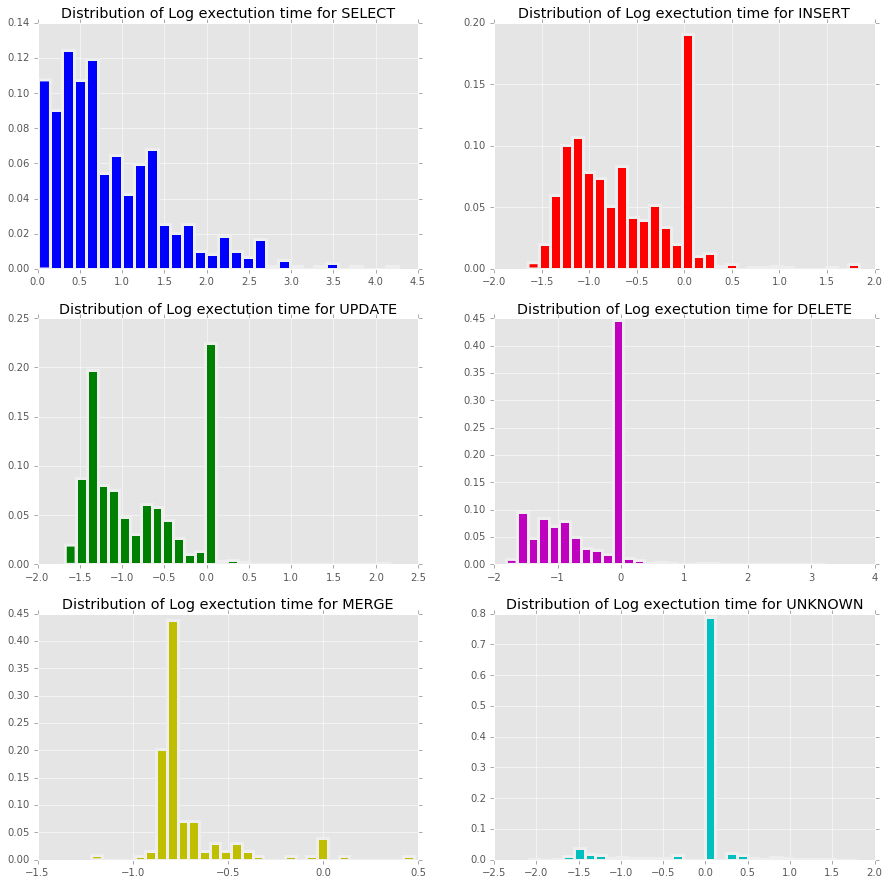

In [38]:
fig,axes = plt.subplots(3,2,figsize=(15,15))
select_data = data[(data.stmttype=='SELECT')&(data.logexectime>0)]
axes[0][0].hist([select_data.logexectime],bins=30, lw=3, color= 'b',weights=np.zeros_like(select_data.logexectime) + 1. / select_data.logexectime.size)
axes[0][0].set_title("Distribution of Log exectution time for SELECT")

insert_data = data[(data.stmttype=='INSERT')&(data.logexectime>0)]
axes[0][1].hist([insert_data.logexectime],bins=30, lw=3, color= 'r',weights=np.zeros_like(insert_data.logexectime) + 1. / insert_data.logexectime.size)
axes[0][1].set_title("Distribution of Log exectution time for INSERT")

update_data = data[(data.stmttype=='UPDATE')&(data.logexectime>0)]
axes[1][0].hist([update_data.logexectime],bins=30, lw=3, color= 'g',weights=np.zeros_like(update_data.logexectime) + 1. / update_data.logexectime.size)
axes[1][0].set_title("Distribution of Log exectution time for UPDATE")

delete_data = data[(data.stmttype=='DELETE')&(data.logexectime>0)]
axes[1][1].hist([delete_data.logexectime],bins=30, lw=3, color= 'm',weights=np.zeros_like(delete_data.logexectime) + 1. / delete_data.logexectime.size)
axes[1][1].set_title("Distribution of Log exectution time for DELETE")

merge_data = data[(data.stmttype=='MERGE')&(data.logexectime>0)]
axes[2][0].hist([merge_data.logexectime],bins=30, lw=3, color= 'y',weights=np.zeros_like(merge_data.logexectime) + 1. / merge_data.logexectime.size)
axes[2][0].set_title("Distribution of Log exectution time for MERGE")

unknown_data = data[data.stmttype=='UNKNOWN']
axes[2][1].hist([unknown_data.logexectime],bins=30, lw=3, color= 'c',weights=np.zeros_like(unknown_data.logexectime) + 1. / unknown_data.logexectime.size)
axes[2][1].set_title("Distribution of Log exectution time for UNKNOWN")